In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout, MaxPooling2D
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from skimage.feature import hog
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import random
from matplotlib.image import imread
from skimage.exposure import exposure

In [2]:
data_dir = 'C:/SJSU/Topics in AI/archive'
train_path = 'C:/SJSU/Topics in AI/archive/Train'
test_path = 'C:/SJSU/Topics in AI/archive/Test'

In [3]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

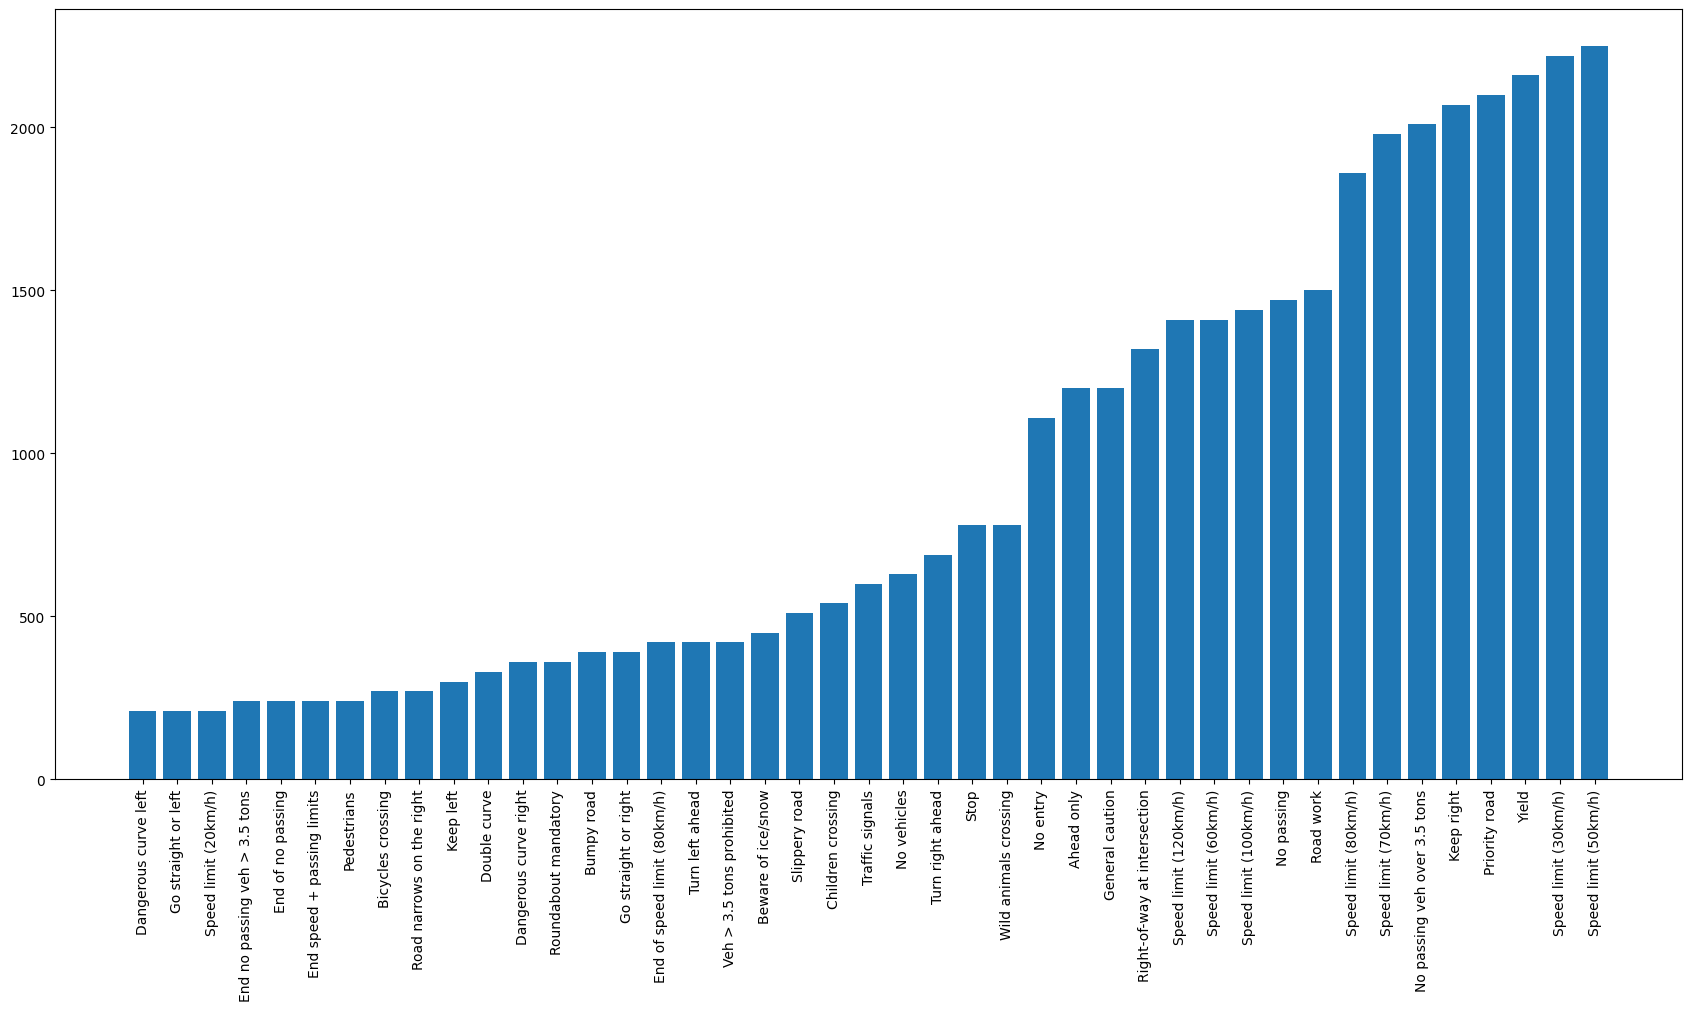

In [4]:
folders = os.listdir(train_path)

num_train_examples = []
class_number = []

for folder in folders:
    num_train_files = len(os.listdir(train_path+"/"+folder))
    num_train_examples.append(num_train_files)
    class_number.append(classes[int(folder)])

zipped_list = zip(num_train_examples, class_number)
sorted_pairs = sorted(zipped_list)

tuples = zip(*sorted_pairs)
num_train_examples, class_number = [list(tuple) for tuple in tuples]

# print(class_number)

plt.figure(figsize=(21,10))  
plt.bar(class_number, num_train_examples)
plt.xticks(class_number, rotation='vertical')
plt.show()

In [5]:
train_csv = pd.read_csv(data_dir + '/Train.csv')
test_csv = pd.read_csv(data_dir + '/Test.csv')

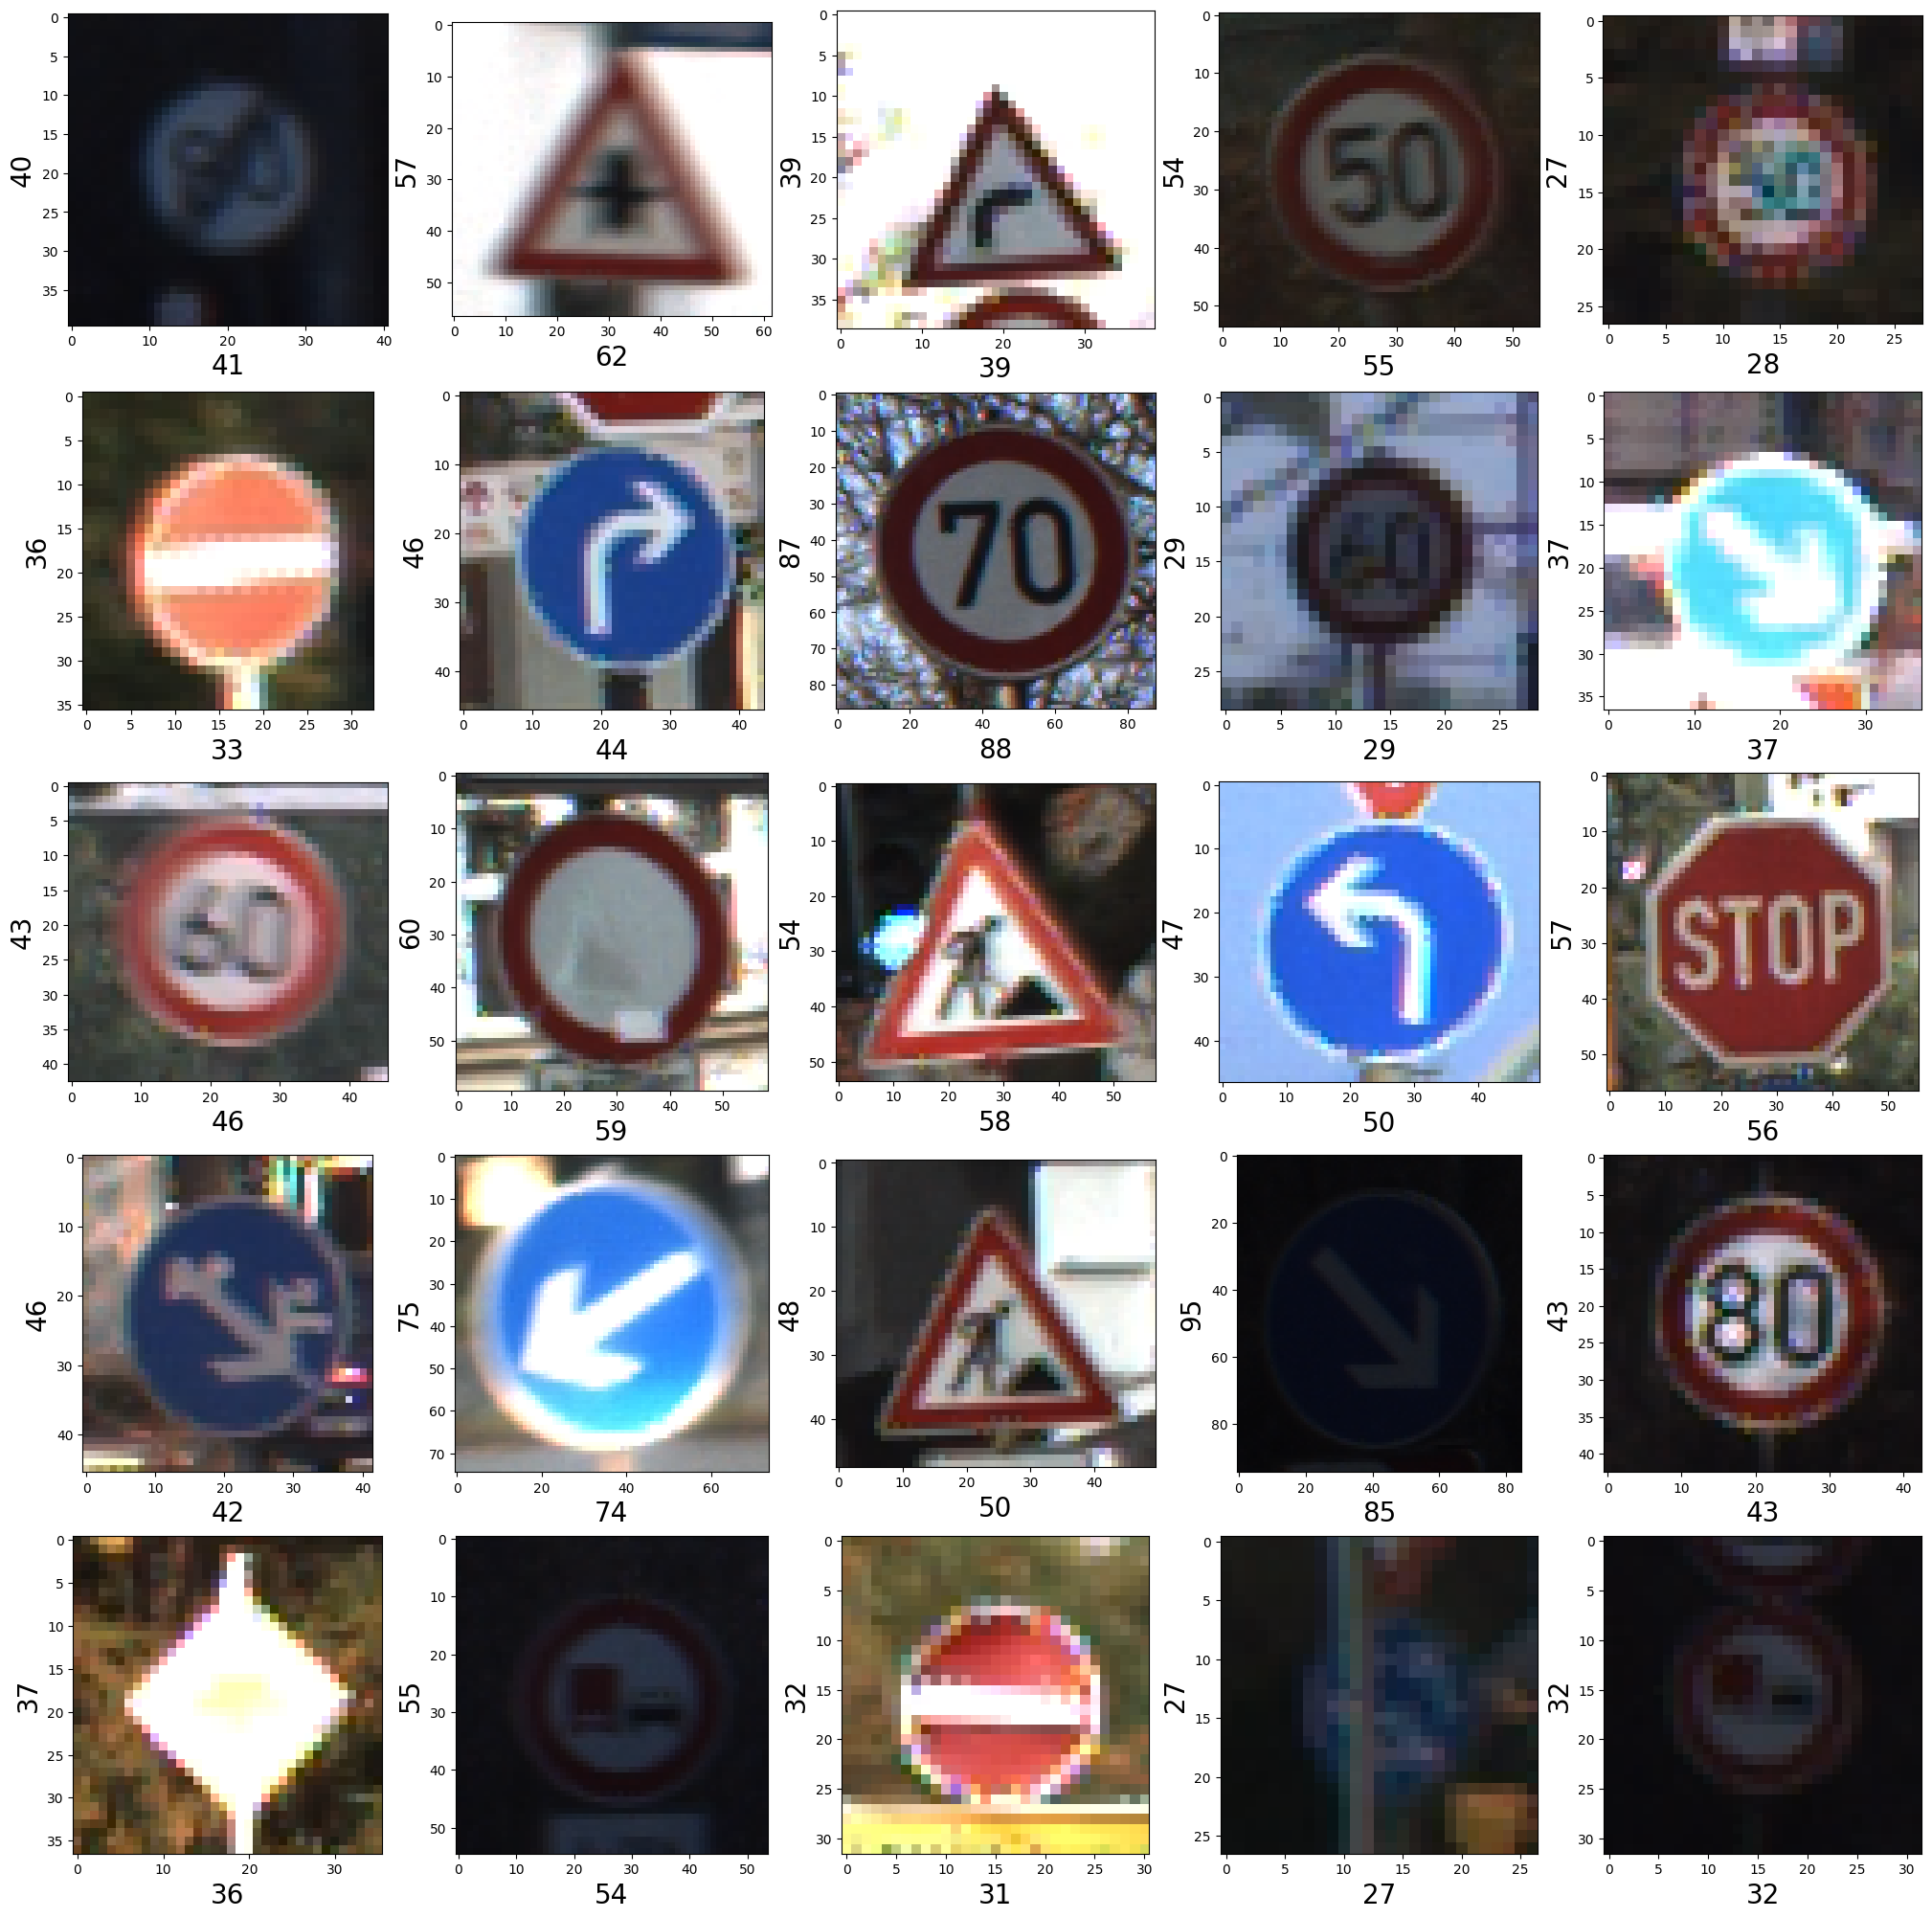

In [6]:
imgs = test_csv["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(visible=0)
    plt.xlabel(rand_img.shape[1], fontsize = 20)
    plt.ylabel(rand_img.shape[0], fontsize = 20)

In [7]:
data = []
labels = []

for i in range(0, len(train_csv)):
    image_path = data_dir+'/'+train_csv['Path'][i]

    image = Image.open(image_path)

    image = image.convert('L')
    image = image.resize((30, 30))
    
    image = np.array(image)
    
    image = image/255.0

    data.append(image)
    labels.append(train_csv['ClassId'][i])

data = np.array(data)
labels = np.array(labels)

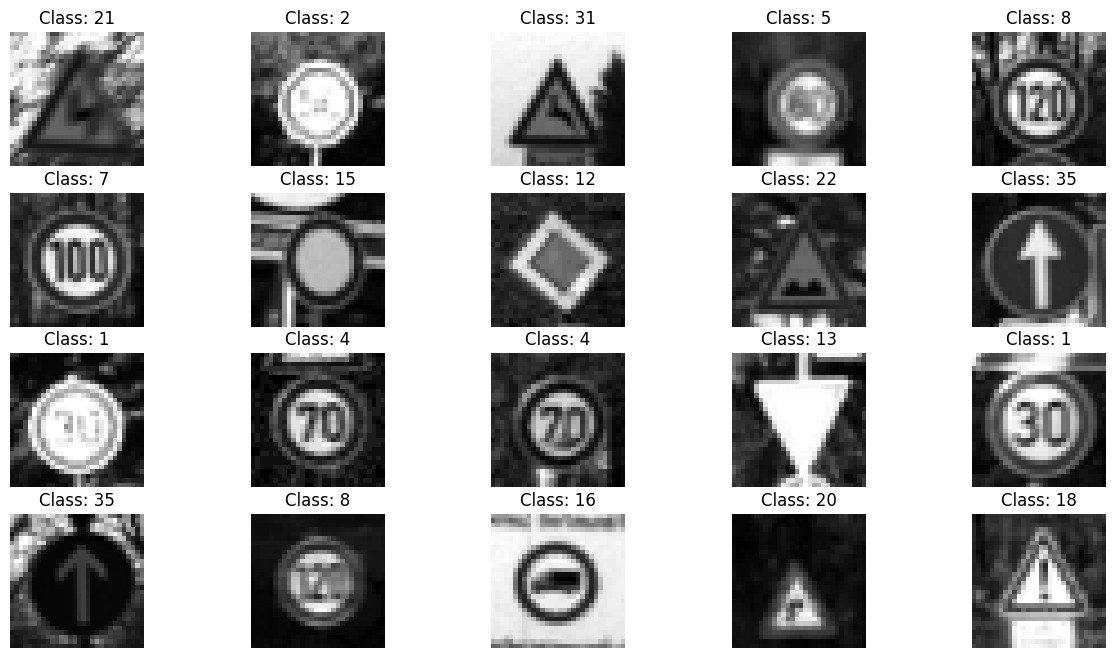

In [8]:
def greyscale_images(data, labels, num_images=20):
    plt.figure(figsize=(15,8))

    for i in range(num_images):
        index = random.randint(0, len(data) - 1)
        image = data[index]
        label = labels[index]

        plt.subplot(4, 5, i+1)

        plt.imshow(image.squeeze(), cmap='gray')
        plt.title(f'Class: {label}')
        plt.axis('off')

    plt.show()

greyscale_images(data, labels, 20)

In [9]:
def prepare_dataset(X, y):
    X_prep = X.astype('float32')
    y_prep = to_categorical(np.array(y))
    return (X_prep, y_prep)

X, y = prepare_dataset(data, labels)

X_train, X_val, Y_train, Y_val = train_test_split(X,y, test_size=0.3, shuffle=True,stratify=y)
X_val, X_test, Y_val, Y_test = train_test_split(X_val,Y_val, test_size=0.5, shuffle=True)

In [10]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), activation="relu", input_shape=(30,30,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=16, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation="softmax"))

In [11]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(X_train,Y_train,
                 epochs=15,
                 batch_size=64,
                 validation_data=(X_val,Y_val))


Epoch 1/15


429/429 [==============================] - 3s 6ms/step - loss: 2.4798 - accuracy: 0.3292 - val_loss: 1.0097 - val_accuracy: 0.7492
Epoch 2/15
429/429 [==============================] - 2s 5ms/step - loss: 0.9257 - accuracy: 0.7242 - val_loss: 0.4174 - val_accuracy: 0.9024
Epoch 3/15
429/429 [==============================] - 2s 5ms/step - loss: 0.5585 - accuracy: 0.8306 - val_loss: 0.2537 - val_accuracy: 0.9454
Epoch 4/15
429/429 [==============================] - 2s 6ms/step - loss: 0.4089 - accuracy: 0.8754 - val_loss: 0.1793 - val_accuracy: 0.9599
Epoch 5/15
429/429 [==============================] - 2s 6ms/step - loss: 0.3388 - accuracy: 0.8967 - val_loss: 0.1386 - val_accuracy: 0.9696
Epoch 6/15
429/429 [==============================] - 2s 5ms/step - loss: 0.2938 - accuracy: 0.9087 - val_loss: 0.1244 - val_accuracy: 0.9711
Epoch 7/15
429/429 [==============================] - 2s 5ms/step - loss: 0.2623 - accuracy: 0.9177 - val_loss: 0.0974 - val_accuracy: 0.9781
Epo

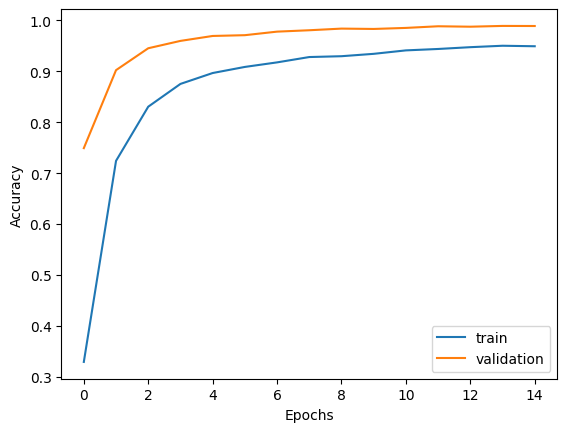

In [12]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

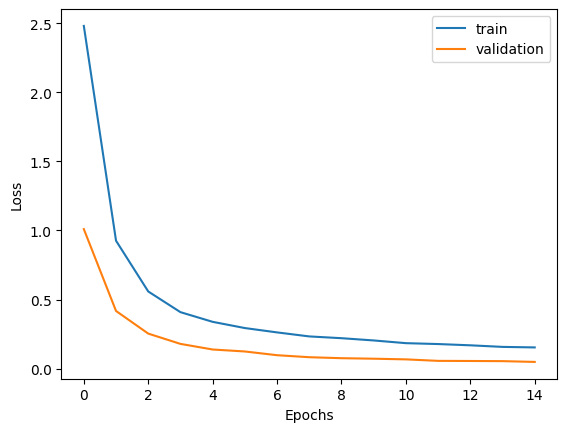

In [13]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

1/1 [==============================] - 0s 67ms/step


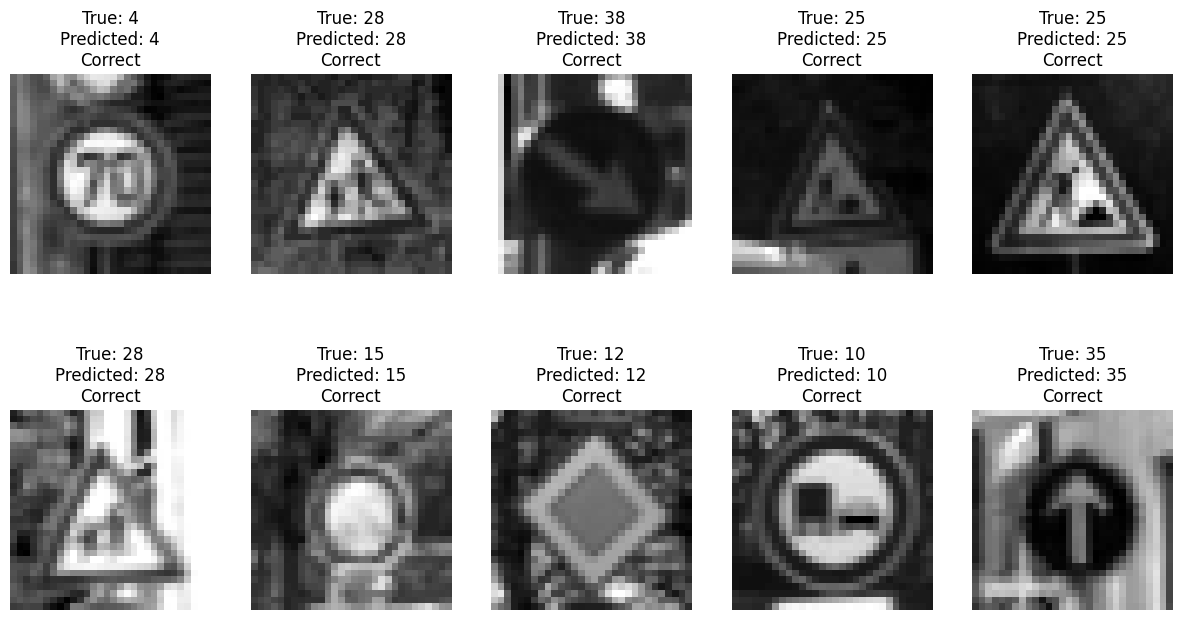

In [14]:
num_examples_to_visualize = 10
random_indices = np.random.choice(len(X_test), num_examples_to_visualize, replace=False)
X_visualize = X_test[random_indices]
Y_visualize_true = np.argmax(Y_test[random_indices], axis=1)

Y_visualize_pred = np.argmax(model.predict(X_visualize), axis=1)

correct_predictions = Y_visualize_true == Y_visualize_pred

plt.figure(figsize=(15, 8))
for i in range(num_examples_to_visualize):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_visualize[i].squeeze(), cmap='gray')
    true_class = Y_visualize_true[i]
    pred_class = Y_visualize_pred[i]
    title = f'True: {true_class}\nPredicted: {pred_class}\n{"Correct" if correct_predictions[i] else "Incorrect"}'
    plt.title(title)
    plt.axis('off')

plt.show()

In [15]:
loss, accuracy = model.evaluate(X_test, Y_test)

print('Accuracy on test data using CNN: ', accuracy)

184/184 [==============================] - 0s 1ms/step - loss: 0.0610 - accuracy: 0.9861
Accuracy on test data using CNN:  0.9860591888427734


In [16]:
test_data = []
test_labels = []
for i in range(len(test_csv)):

    image_path = data_dir + '/' + test_csv['Path'][i]

    image = Image.open(image_path)
    image = image.convert('L')
    image = image.resize((30, 30))
    
    image = np.array(image)
    image = image/255.0

    image = image.reshape((1, 30, 30, 1))

    true_class = test_csv['ClassId'][i]

    test_data.append(image)
    test_labels.append(true_class)

test_data = np.array(test_data)
test_data = test_data.astype('float32')

test_labels = np.array(test_labels)
test_labels = to_categorical(np.array(test_labels), num_classes = 43)

loss, acc = model.evaluate(test_data, test_labels)

print(acc)

395/395 [==============================] - 1s 2ms/step - loss: 0.2589 - accuracy: 0.9367
0.9366587400436401


In [17]:
train, validation = train_test_split(train_csv, test_size=0.2, random_state=42)

In [24]:
def images_to_hog(main):
    features = []
    labels = []

    for i in range(0, len(main)):
        img_path = data_dir+'/'+main['Path'].iloc[i]
        image = Image.open(img_path)

        image = image.convert('L')
        image = image.resize((30, 30))

        descriptor = hog(image, orientations=8, pixels_per_cell=(2,2))

        features.append(descriptor)
        labels.append(main['ClassId'].iloc[i])

    features = np.array(features)
    labels = np.array(labels)

    return features, labels

In [25]:
features_training, labels_training = images_to_hog(train)
features_validation, labels_validation = images_to_hog(validation)
features_testing, labels_testing = images_to_hog(test_csv)

In [26]:
print(features_training.shape, labels_training.shape)
print(features_validation.shape, labels_validation.shape)
print(features_testing.shape, labels_testing.shape)

(31367, 12168) (31367,)
(7842, 12168) (7842,)
(12630, 12168) (12630,)


In [27]:
pca = PCA(n_components = 40)

X_train = pca.fit_transform(features_training)
X_validation = pca.transform(features_validation)
X_test = pca.transform(features_testing)

print('New training dataset after principal component analysis: ', X_train.shape)
print('New validation dataset after principal component analysis: ', X_validation.shape)
print('New testing dataset after principal component analysis: ', X_test.shape)

New training dataset after principal component analysis:  (31367, 40)
New validation dataset after principal component analysis:  (7842, 40)
New testing dataset after principal component analysis:  (12630, 40)


In [28]:
svm = SVC(kernel='rbf', gamma='scale')
svm.fit(X_train, labels_training)

SVC()

In [30]:
print('SVM accuracy on training dataset: ', svm.score(X_train, labels_training))
print('SVM accuracy on validation dataset: ', svm.score(X_validation, labels_validation))
print('SVM accuracy on testing dataset: ', svm.score(X_test, labels_testing))

SVM accuracy on training dataset:  0.9660790002231645
SVM accuracy on validation dataset:  0.9509053812802857
SVM accuracy on testing dataset:  0.8557403008709422


In [ ]:
n = random.randint(0, len(test_csv))

image_path = data_dir+'/'+test_csv['Path'][n]
original_class = test_csv['ClassId'][n]
print('Image path: ', image_path)
image = Image.open(image_path)
image_gray = image.convert('L')
image_gray = image_gray.resize((30, 30))

descriptor, imagehog = hog(image_gray, orientations=8, pixels_per_cell=(2,2), visualize=True)

descriptor_pca = pca.transform(descriptor.reshape(1, -1))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 15), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image.resize((30, 30)), cmap=plt.cm.gray)
ax1.set_title('Original image')

ax2.axis('off')
ax2.imshow(image_gray, cmap=plt.cm.gray)
ax2.set_title('Grayscale image')

hog_image_rescaled = exposure.rescale_intensity(imagehog, in_range=(0, 10))

ax3.axis('off')
ax3.imshow(imagehog, cmap=plt.cm.gray)
ax3.set_title('HOG')
plt.show()

predicted_class = svm.predict(descriptor_pca)[0]

print('Predicted class: ', predicted_class)
print('Original class: ', original_class)

predicted_class_img = Image.open(data_dir+'/meta/'+str(predicted_class)+'.png')
original_class_img = Image.open(data_dir+'/meta/'+str(original_class)+'.png')

fig, (ax4, ax5) = plt.subplots(1, 2, figsize=(10,5))

ax4.axis('off')
ax4.imshow(predicted_class_img, cmap=plt.cm.gray)
ax4.set_title('Predicted class image')

ax5.axis('off')
ax5.imshow(original_class_img, cmap=plt.cm.gray)
ax5.set_title('True class image')

plt.tight_layout()

plt.show()